<div class="alert alert-block alert-warning"  style="background-color: #be5bf0; color: black;">  
  <h1> Imports </h1>
</div>

In [1]:
import pandas as pd 
import numpy as np
import warnings
import time
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import make_classification, make_blobs, load_iris # for making synthetic data
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

random_state = 42

<div class="alert alert-block alert-warning"  style="background-color: #be5bf0; color: black;">  
  <h1> K-Means Class Implementation </h1>
</div>

In [2]:
class KMeansDSA:
    """K-Means Algorithm"""

    def __init__(self, n_clusters=3, max_iterations=100, random_state=None):
        """
        Initialize KMeans clustering algorithm.

        Parameters:
        ----------
            - n_clusters (int): Number of clusters (default is 3)
            - max_iterations (int): Maximum number of iterations (default is 100)
            - random_state (int): Seed for random number generation (default is None)

        Returns: None
        -------

        Time Complexity: O(1)
        ---------------
        """
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        self.complexity = None

    def fit(self, data):
        """
        Fit the KMeans algorithm to the input data.

        Parameters:
        ----------
        data: Numpy array of shape (m, n) representing m data points
              in an n-dimensional space

        Returns: None
        -------
        This method does not return a value. 
        It updates the centroids and labels based on the data.

        Time Complexity: O(m * K * I * n)
        ---------------
            - m: Number of points
            - K: Number of clusters
            - I: Number of iterations
            - n: Number of attributes (dimensionality of the space)
        """
        # Implementation of KMeans algorithm
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # Step 1: Pick random points as centroids
        random_points = np.random.choice(
            a=data.shape[0], size=self.n_clusters, replace=False
        )
        self.centroids = data[random_points]

        # Update centroids and labels
        for iter in range(self.max_iterations):
            # Step 2: Assign each point to the closest centroid
            distances = np.linalg.norm(
                data[:, np.newaxis, :] - self.centroids, axis=2
            )
            self.labels = np.argmin(distances, axis=1)

            # Step 3: Update centroids
            new_centroids = np.array(
                [
                    (
                        data[self.labels == j].mean(axis=0)
                        if np.any(self.labels == j)
                        else self.centroids[j]
                    )
                    for j in range(self.n_clusters)
                ]
            )

            # Check for convergence
            if np.allclose(self.centroids, new_centroids, atol=1e-4):
                break

            self.centroids = new_centroids

    def predict(self, data):
        """
        Assign data points to the nearest cluster based on current centroids.

        Parameters:
        ----------
        data (numpy.ndarray): Numpy array of shape (m, n) representing 
                              m data points in an n-dimensional space

        Returns:
        -------
        labels (numpy.ndarray): Array of cluster labels assigned to each data point

        Time Complexity: O(m * K * n)
        ---------------
        """
        # Implementation of data point assignment
        distances = np.linalg.norm(
            data[:, np.newaxis, :] - self.centroids, axis=2
        )
        self.labels = np.argmin(distances, axis=1)
        return self.labels

    def get_centroids(self):
        """
        Get the current centroids after fitting the algorithm.

        Parameters: None
        ----------

        Returns:
        -------
        centroids: Numpy array representing the centroids of clusters

        Time Complexity: O(1)
        ---------------
        """
        return self.centroids

    def get_complexity(self, data, print_complexity=False):
        """
        Get the overall time complexity.

        Parameters:
        ----------
            - data (numpy.ndarray): Numpy array of shape (m, n) representing 
                                    m data points in an n-dimensional space
            - print_complexity (bool): True or False for displaying 
                                       time complexity (default is False)

        Returns:
        -------
        complexity (float): Theoretical Complexity
        """
        m = len(data)
        k = self.n_clusters
        iteration = self.max_iterations
        n = data.shape[1]
        complexity = m * k * (iteration + 1) * n

        if print_complexity:
            print("Time Complexity Analysis:")
            print(f"Number of Points (m): {m}")
            print(f"Number of Clusters (K): {k}")
            print(f"Number of Iterations (I): {iteration + 1}")
            print(f"Number of Attributes (n): {n}")
            print(f"Time Complexity: O(m * K * I * n) = {complexity}")

        self.complexity = complexity

        return self.complexity

<div class="alert alert-block alert-warning"  style="background-color: #be5bf0; color: black;">  
  <h1> 1. K-Means vs. K-Means Dimensionality Techniques </h1>
  Exploring different dimensionality reduction techniques such as PCA, T-SNE, and LDA using Iris.
</div>

Perform Bootstrapped K-Means across all features and calculate average silhouette score across 100 runs. 

In [3]:
# No Need to clean this data set since it is already clean.
X,y = load_iris(return_X_y=True)

In [4]:
# Ensure we are passing the numpy array to KMeans and not dataframes because 
# custom implementation expects numpy arrays.
def avg_silhouette_score(X, n_clusters, num_runs=100):
    """
    Compute the average silhouette score for KMeans clustering over multiple runs.

    Parameters:
    ----------
    X : numpy.ndarray
        Dataset for clustering.
    n_clusters : int
        Number of clusters for KMeans.
    num_runs : int, optional
        Number of runs to compute the average silhouette score (default is 100).

    Returns:
    -------
    float
        The average silhouette score.
    """
    scores = []

    for i in range(num_runs):
        # Resampling with the same size as the original dataset
        n_samples = X.shape[0]  # Number of rows in the original dataset
        indices = np.random.choice(
            n_samples, size=n_samples, replace=True
        )  # Random indices
        X_resampled = X[indices]  # Resampled dataset

        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X_resampled)

        score = silhouette_score(X_resampled, kmeans.labels_)
        scores.append(score)

    return np.mean(scores)


num_runs = 100
n_clusters = 3
k_means_avg_sil_score = avg_silhouette_score(
    X, n_clusters=n_clusters, num_runs=num_runs
)

# Format the output to show 2 decimal points
print(
    f"Average Silhouette Score for Base K-Means Model over {num_runs} runs: "
    f"{k_means_avg_sil_score:.2f}"
)

Average Silhouette Score for Base K-Means Model over 100 runs: 0.56


# K-Means vs. K-Means & PCA

In [5]:
def kmeans_vs_pca(
    X, y, n_clusters=3, init="kmeans++", random_state=42, use_95=False, n_components=2
):
    """
    Compare KMeans clustering with PCA-reduced data and original data.

    Parameters:
    ----------
    X : numpy.ndarray or pandas.DataFrame
        The input features for clustering.
    y : numpy.ndarray or pandas.Series
        The target labels.
    n_clusters : int, optional
        Number of clusters for KMeans (default is 3).
    init : str, optional
        Initialization method for KMeans (default is 'kmeans++').
    random_state : int, optional
        Seed for reproducibility (default is 42).
    use_95 : bool, optional
        Whether to use enough PCA components to explain 95% variance (default is False).
    n_components : int, optional
        Number of PCA components to retain (default is 2).

    Returns:
    -------
    None
    """
    # Finding Optimal Clusters
    X_scaled = StandardScaler().fit_transform(X)
    X_pca = PCA(n_components=n_components)
    X_principled = X_pca.fit_transform(X_scaled)

    explained = X_pca.explained_variance_ratio_
    explain = pd.DataFrame(explained)
    components = range(1, len(explained) + 1, 1)
    explain["components"] = components
    explain.rename(columns={0: "Percent_var_explained"}, inplace=True)

    # Finding the Best Components
    if use_95:
        var = 0
        for index, value in enumerate(explain["Percent_var_explained"]):
            var += value
            if var >= 0.95:
                n_components = explain["components"][index]
                break

    X_scaled = StandardScaler().fit_transform(X)
    X_pca = PCA(n_components=n_components)
    X_principled = X_pca.fit_transform(X_scaled)

    plt.bar(
        explain["components"],
        explain["Percent_var_explained"],
        width=0.2,
        label="Explained Variance",
    )
    plt.plot(
        explain["components"],
        explain["Percent_var_explained"],
        color="black",
        marker="o",
        label="Trend Line",
    )
    plt.ylabel("Percentage of Explained Variances")
    plt.xlabel("Principal Components")
    plt.xticks(explain["components"])
    plt.legend()
    plt.show()

    # Comparing KMeans
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # KMeans with PCA-reduced data
    kmeans_pca = KMeans(
        n_clusters=n_clusters, init="k-means++", random_state=random_state
    )
    kmeans_pca.fit(X_principled)
    y_pred_pca = kmeans_pca.predict(X_principled)

    for i in range(n_clusters):
        ax1.scatter(
            X_principled[y_pred_pca == i, 0],
            X_principled[y_pred_pca == i, 1],
            label=f"Cluster {i+1}",
        )
    ax1.set_xlabel("PCA1")
    ax1.set_ylabel("PCA2")
    ax1.legend()
    ax1.set_title("K-Means Clustering on PCA-Reduced Data")

    # KMeans with original data
    kmeans = KMeans(
        n_clusters=n_clusters, init="k-means++", random_state=random_state
    )
    kmeans.fit(X)
    y_pred = kmeans.predict(X)

    for i in range(n_clusters):
        ax2.scatter(
            X[y_pred == i, 0],
            X[y_pred == i, 1],
            label=f"Cluster {i+1}",
        )
    ax2.set_xlabel("Feat1")
    ax2.set_ylabel("Feat2")
    ax2.legend()
    ax2.set_title("K-Means Clustering on Original Data")
    plt.show()

    print(
        f"Silhouette Score PCA-K-Means: {silhouette_score(X_principled, y_pred_pca):.4f}. "
        f"Silhouette Score K-Means: {silhouette_score(X, y_pred):.4f}"
    )

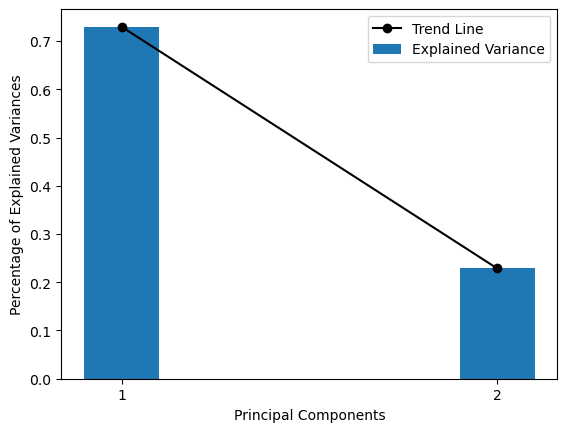

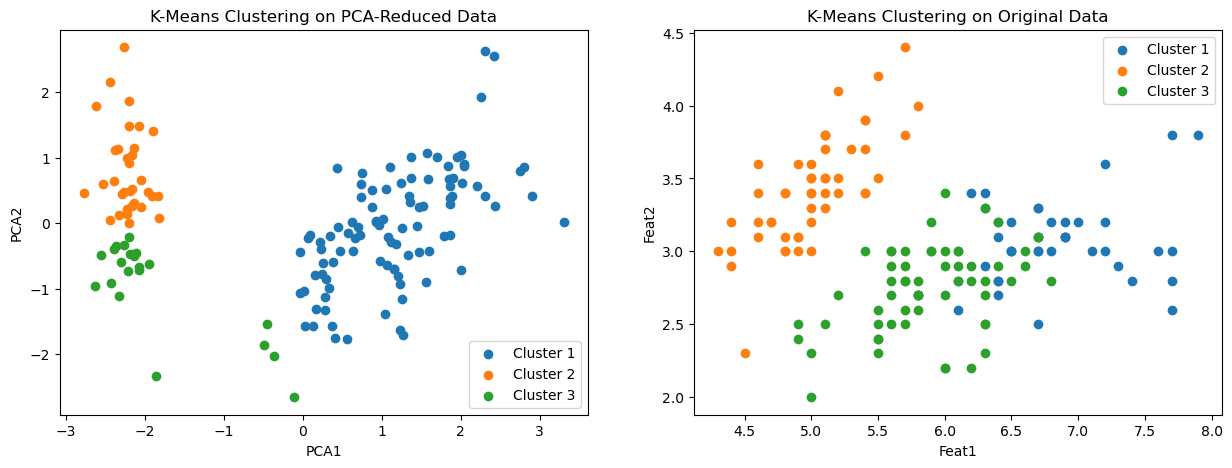

Silhouette Score PCA-K-Means: 0.5228. Silhouette Score K-Means: 0.5512


In [6]:
kmeans_vs_pca(X,y,use_95=True,n_clusters=3,n_components=2)

Principal Component Analysis (PCA) is a common dimensionality reduction technique that is mainly used to simplify larger data sets while keeping maintaining the original patterns and trends.

When analyzing the effects of PCA on K-Means performance, K-Means uses all of the features in the dataset while PCA reduced the dataset into a smaller number of features with the best number being 2.


In the case of the IRIS dataset, when using Silhouette Score as a measure of performance, K-Means out performs PCA by a score of 0.07. If we look at the clusters visually though we see that PCA does a better job at clustering the data in a 2d plane.


K-Means outperforming PCA could be the result of PCA reducing to many dimensions where they no longer explain enough variance. This occurrence is common in smaller feature datasets like IRIS.

# K-Means vs. K-Means & t-SNE

In [7]:
def kmeans_vs_tsne(
    X, 
    y, 
    n_clusters=3, 
    init="kmeans++", 
    random_state=42, 
    use_95=False, 
    perplexity=5, 
    learning_rate=1.2
):
    """
    Compare KMeans clustering with TSNE-reduced data and original data.

    Parameters:
    ----------
    X : numpy.ndarray or pandas.DataFrame
        The input features for clustering.
    y : numpy.ndarray or pandas.Series
        The target labels.
    n_clusters : int, optional
        Number of clusters for KMeans (default is 3).
    init : str, optional
        Initialization method for KMeans (default is 'kmeans++').
    random_state : int, optional
        Seed for reproducibility (default is 42).
    use_95 : bool, optional
        Unused parameter, reserved for future functionality (default is False).
    perplexity : int, optional
        Perplexity parameter for TSNE (default is 5).
    learning_rate : float, optional
        Learning rate parameter for TSNE (default is 1.2).

    Returns:
    -------
    None
    """
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", module="sklearn.manifold")
    warnings.filterwarnings("ignore")

    tsne = TSNE(
        n_components=3,
        perplexity=perplexity,
        random_state=random_state,
        learning_rate=learning_rate,
    )
    X_tsne = tsne.fit_transform(X)
    n_samples = X_tsne.shape[0]
    best_div = np.inf
    best_perplex = np.inf

    for i in range(1, 4):
        for j in range(10, n_samples-5, 15):
            tsne = TSNE(
                n_components=i,
                perplexity=j,
                random_state=random_state,
                learning_rate=learning_rate,
                init="pca",
            )
            X_tsne = tsne.fit_transform(X)
            div = tsne.kl_divergence_

            if div < best_div:
                best_div = div
                best = i
                best_perplex = j
                best_X = X_tsne

    # Comparing to KMeans
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    tsne = TSNE(
        n_components=best,
        perplexity=best_perplex,
        random_state=random_state,
        learning_rate=learning_rate,
    )
    X_tsne = tsne.fit_transform(X)

    # KMeans with TSNE-reduced data
    kmeans_tsne = KMeans(n_clusters=n_clusters, init="k-means++", random_state=random_state)
    kmeans_tsne.fit(X_tsne)
    y_pred_tsne = kmeans_tsne.predict(X_tsne)

    for i in range(n_clusters):
        ax1.scatter(
            X_tsne[y_pred_tsne == i, 0],
            X_tsne[y_pred_tsne == i, 1],
            label=f"Cluster {i+1}",
        )
    ax1.set_xlabel("TSNE1")
    ax1.set_ylabel("TSNE2")
    ax1.legend()
    ax1.set_title("K-Means Clustering on TSNE-Reduced Data")

    # KMeans with original data
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=random_state)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)

    for i in range(n_clusters):
        ax2.scatter(
            X[y_pred == i, 0],
            X[y_pred == i, 1],
            label=f"Cluster {i+1}",
        )
    ax2.set_xlabel("Feat1")
    ax2.set_ylabel("Feat2")
    ax2.legend()
    ax2.set_title("K-Means Clustering on Original Data")
    plt.show()

    print(
        f"Silhouette Score TSNE-K-Means: {silhouette_score(X_tsne, y_pred_tsne):.4f}. "
        f"Silhouette Score K-Means: {silhouette_score(X, y_pred):.4f}"
    )

    fig.show()

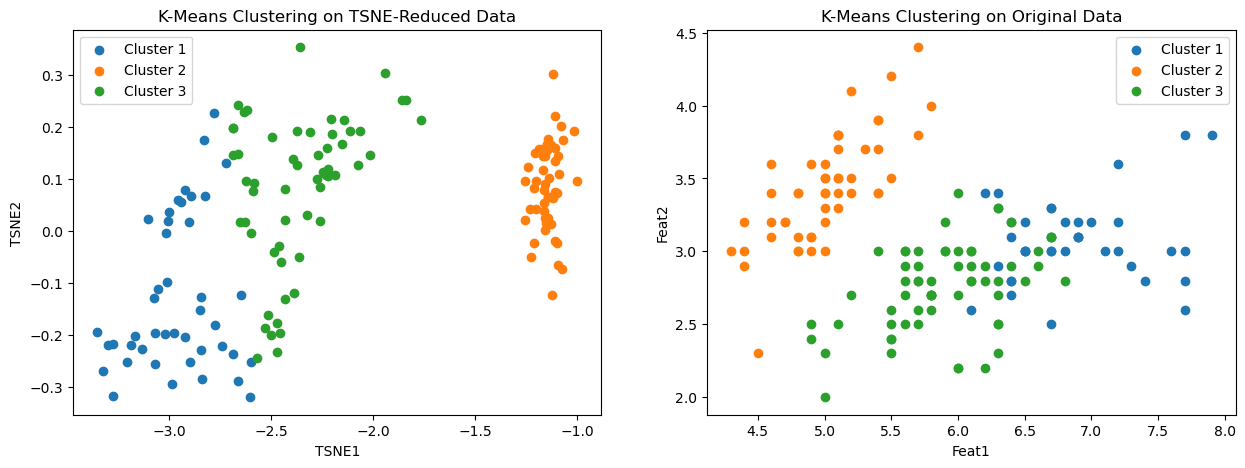

Silhouette Score TSNE-K-Means: 0.6102. Silhouette Score K-Means: 0.5512


In [8]:
kmeans_vs_tsne(
    X=X,
    y=y,
    n_clusters=3,
    init="kmeans++",
    random_state=42,
    use_95=False,
    perplexity=5,
    learning_rate=1.2,
)

T-Distributed Stochastic Neighbors (T-SNE) is a statistical method for visualizing high dimensional data in a 2-D or 3-D plane, while also having aspects of dimensionality reduction. 

When used alongside K-Means we see that clustering improves when TSNE is used to reduce dimensions before running K-Means on it. This result is backed up by the Silhouette score for the T-SNE model being closer to 1 than the Silhouette score for K-Means.

# K-Means vs. K-Means & LDA

In [9]:
def lda(X=None, y=None, n_components=2, generate_data=True, visualize=True,
        n_samples=300, n_features=4, n_informative=2, n_classes=3, 
        n_redundant=1, n_clusters_per_class=1, random_state=42, get_time=False):
    """ 
    Perform LDA and visualize. 

    Parameters
    ----------
        - X (None, optional): Input data. Defaults to None.
        - y (None, optional): Target data. Defaults to None.
        - n_componenets (int, optional): Number of components to use in LDA. Defaults to 2.
        - generate_data (bool, optional): Flag to generate data. Defaults to True.
        - visualize (bool, optional): Flag to visualize. Defaults to True. 
        - n_samples (int, optional): Number of samples. Defaults to 300.
        - n_features (int, optional): Number of features. Defaults to 4.
        - n_informative (int, optional): Number of informative features. Defaults to 2.
        - n_classes (int, optional): Number of classes. Defaults to 3.
        - n_redundant (int, optional): Number of redundant features. Defaults to 1.
        - n_clusters_per_class (int, optional): Number of clusters per class. Defaults to 1.
        - random_state (int, optional): Random state. Defaults to 42.
        - get_time (bool, optional): Flag to get time. Defaults to False.

    Returns
    -------
        - X_lda (array-like): Transformed data
        - runtime (float): Time taken to perform LDA. No return value if get_time is False.

    """ 
    if generate_data == True:
        X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, 
                                   n_classes=n_classes, n_redundant=n_redundant, n_clusters_per_class=n_clusters_per_class, 
                                   random_state=random_state)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    start_time = time.time()
    lda = LDA(n_components=n_components)
    X_lda = lda.fit_transform(X_scaled, y)
    end_time = time.time()
    runtime = end_time - start_time

    if visualize == True:
        plt.figure(figsize=(8, 6))
        for i, label in enumerate(np.unique(y)):
            plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=f'Class {label}')

        plt.xlabel('LD1')
        plt.ylabel('LD2')
        plt.legend()
        plt.title('LDA Dimensionality Reduction Visualized')
        plt.show()

    if get_time==True:
        return runtime
    
    return X_lda

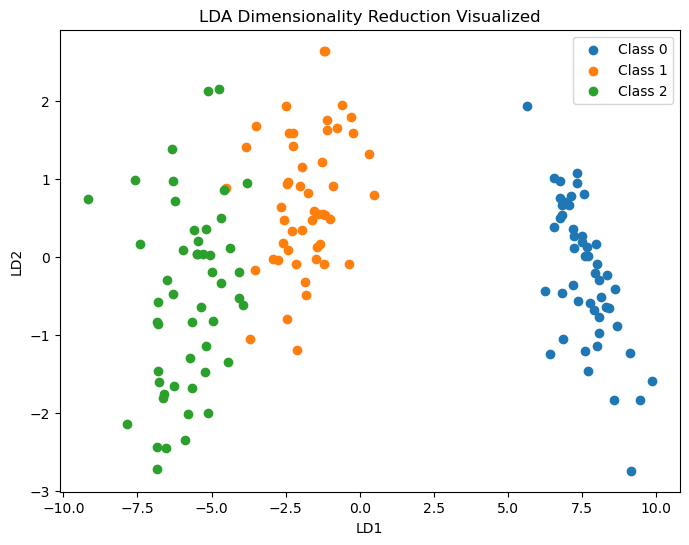

In [10]:
X_lda = lda(X, y, n_components=2, generate_data=False, visualize=True, n_samples=100, n_features=5, n_informative=5, n_classes=3)

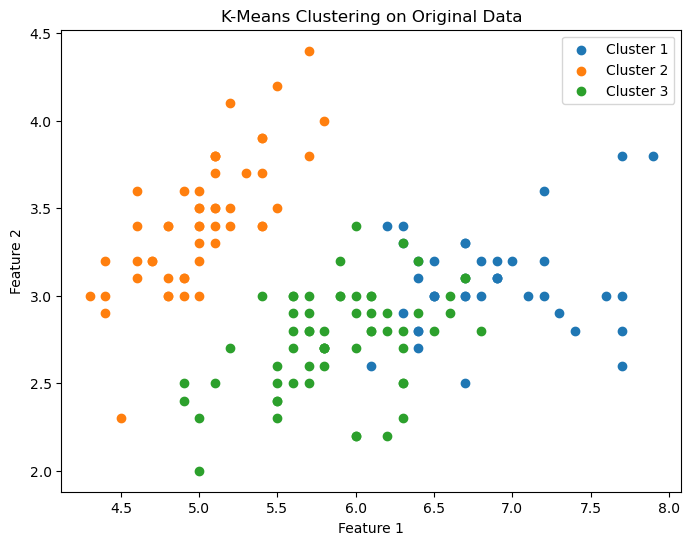

Silhouette Score: 0.5511916046195919


In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], label=f'Cluster {i+1}')
    
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('K-Means Clustering on Original Data')
plt.show()

print(f'Silhouette Score: {silhouette_score(X, y_kmeans)}')

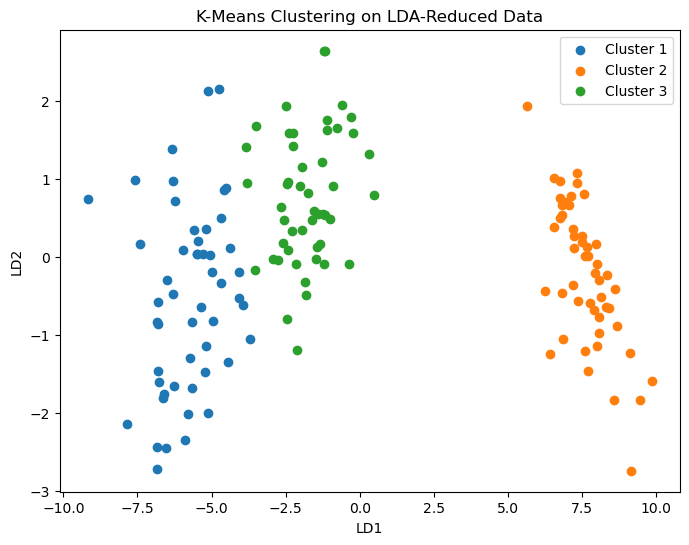

Silhouette Score: 0.6558160584290523


In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_lda)
y_kmeans = kmeans.predict(X_lda)

plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_lda[y_kmeans == i, 0], X_lda[y_kmeans == i, 1], label=f'Cluster {i+1}')
    
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.title('K-Means Clustering on LDA-Reduced Data')
plt.show()

print(f'Silhouette Score: {silhouette_score(X_lda, y_kmeans)}')

As you can see in the visualizations, the LDA-Reduced data performs better in K-Means clustering than the original data. This is because LDA reduces features by maximizing the distance between the means of classes in high-dimensional space. Here, we see that there are clearer separations between the clusters in K-Means after the features have been reduced by LDA. Therefore there is a clearer distinction between green and blue in the LDA-Reduced data compared to clustering without LDA.

Let's try this on more datasets (we won't print all the graphs to save computation time and space):

In [13]:

# Function to generate datasets 
def generate_dataset(n_samples, n_features, n_informative, n_classes, random_state):
    return make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        n_redundant=0,
        n_classes=n_classes,
        n_clusters_per_class=1,
        random_state=random_state
    )

# Generate 5 datasets
X1, y1 = generate_dataset(100, 5, 5, 3, random_state=1)
X2, y2 = generate_dataset(200, 10, 8, 4, random_state=2)
X3, y3 = generate_dataset(150, 6, 5, 2, random_state=3)
X4, y4 = generate_dataset(300, 8, 6, 5, random_state=4)
X5, y5 = generate_dataset(120, 7, 7, 3, random_state=5)


X1_lda = lda(X1, y1, n_components=2, generate_data=False, visualize=False, n_samples=100, n_features=5, n_informative=5, n_classes=3)
X2_lda = lda(X2, y2, n_components=3, generate_data=False, visualize=False, n_samples=200, n_features=10, n_informative=8, n_classes=4)
X3_lda = lda(X3, y3, n_components=1, generate_data=False, visualize=False, n_samples=150, n_features=6, n_informative=5, n_classes=2)
X4_lda = lda(X4, y4, n_components=4, generate_data=False, visualize=False, n_samples=300, n_features=8, n_informative=6, n_classes=5)
X5_lda = lda(X5, y5, n_components=2, generate_data=False, visualize=False, n_samples=120, n_features=7, n_informative=7, n_classes=3)

# Get silhouette scores:
def get_silhouette(X, y, n_clusters, random_state=None):
    kmeans = KMeans(n_clusters=3, random_state=None)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    return silhouette_score(X, y_kmeans)

original_datasets = [X1, X2, X3, X4, X5]
LDA_datasets = [X1_lda, X2_lda, X3_lda, X4_lda, X5_lda]
clusters = [3, 4, 2, 5, 3]

original_silhouettes = []
LDA_silhouettes = []
for i in range(len(original_datasets)):
    original_silhouette = get_silhouette(original_datasets[i], y1, clusters[i])
    LDA_silhouette = get_silhouette(LDA_datasets[i], y1, clusters[i])
    original_silhouettes.append(original_silhouette)
    LDA_silhouettes.append(LDA_silhouette)


In [14]:
original_LDA_comparison = pd.DataFrame({'Dataset': ['X1', 'X2', 'X3', 'X4', 'X5'], 
                                        'Original Silhouette Score': original_silhouettes, 
                                        'LDA Silhouette Score': LDA_silhouettes})
original_LDA_comparison

,Dataset,Original Silhouette Score,LDA Silhouette Score
0,X1,0.277688,0.539362
1,X2,0.141643,0.301758
2,X3,0.269077,0.616351
3,X4,0.157964,0.219077
4,X5,0.164907,0.424917


<div class="alert alert-block alert-warning"  style="background-color: #be5bf0; color: black;">  
  <h1> 2. Compare Dimensionality Techniques </h1>
</div>

In [15]:
def tsne_pca_sil_score(X,n_clusters=3,init='kmeans++',random_state=42,use_95 =False,perplexity = 5,learning_rate = 1.2, n_components=2):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore",module='sklearn.manifold')
    warnings.filterwarnings("ignore")
    tsne = TSNE(n_components=3,perplexity = 5,random_state=42,learning_rate=1.2)
    X_tsne = tsne.fit_transform(X)
    n_samples = X_tsne.shape[0]
    bet_div = np.inf
    best_perplex = np.inf
    for i in range(1,4):
        for j in range(10,n_samples-5,15):
            tsne = TSNE(n_components=i,perplexity = j,random_state=42,learning_rate=1.2,init='pca')
            X_tsne = tsne.fit_transform(X)
            div = tsne.kl_divergence_
            #print(f'KL Divergence with {i} components: {div:.2f}')
            if div < bet_div:
                bet_div = div
                best = i
                best_perplex = j
                best_X = X_tsne
    tsne = TSNE(n_components=best,perplexity = best_perplex,random_state=42,learning_rate=1.2)
    X_tsne = tsne.fit_transform(X)

    kmeans_tsne = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans_tsne.fit(X_tsne)
    y_pred_tsne = kmeans_tsne.predict(X_tsne)
    tsne_sil_score = silhouette_score(X_tsne, y_pred_tsne)
    
    X_scaled = StandardScaler().fit_transform(X)
    X_pca = PCA(n_components=n_components)
    X_principled = X_pca.fit_transform(X_scaled)

    explained = X_pca.explained_variance_ratio_
    explain = pd.DataFrame(explained)
    components = range(1, len(explained) + 1, 1)
    explain["components"] = components
    explain.rename(columns={0: "Percent_var_explained"}, inplace=True)

    # Finding the Best Components
    if use_95:
        var = 0
        for index, value in enumerate(explain["Percent_var_explained"]):
            var += value
            if var >= 0.95:
                n_components = explain["components"][index]
                break


    X_scaled = StandardScaler().fit_transform(X)
    X_pca = PCA(n_components=n_components)
    X_principled = X_pca.fit_transform(X_scaled)
    kmeans_pca = KMeans(n_clusters=n_clusters, init="k-means++", random_state=random_state)
    kmeans_pca.fit(X_principled)
    y_pred_pca = kmeans_pca.predict(X_principled)
    pce_sil_score = silhouette_score(X_principled, y_pred_pca)
    return tsne_sil_score, pce_sil_score

In [16]:
X1, y1 = generate_dataset(100, 5, 5, 3, random_state=1)
X2, y2 = generate_dataset(200, 10, 8, 4, random_state=2)
X3, y3 = generate_dataset(150, 6, 5, 2, random_state=3)
X4, y4 = generate_dataset(300, 8, 6, 5, random_state=4)
X5, y5 = generate_dataset(120, 7, 7, 3, random_state=5)

tsne_score1,pca_score1 = tsne_pca_sil_score(X1,n_clusters=3,init='kmeans++',use_95 = True, random_state=42,perplexity = 5,learning_rate = 1.2, n_components=5)
tsne_score2,pca_score2 = tsne_pca_sil_score(X2,n_clusters=3,init='kmeans++',use_95 = True, random_state=42,perplexity = 5,learning_rate = 1.2, n_components=10)
tsne_score3,pca_score3 = tsne_pca_sil_score(X3,n_clusters=3,init='kmeans++',use_95 = True, random_state=42,perplexity = 5,learning_rate = 1.2, n_components=6)
tsne_score4,pca_score4 = tsne_pca_sil_score(X4,n_clusters=3,init='kmeans++',use_95 = True, random_state=42,perplexity = 5,learning_rate = 1.2, n_components=8)
tsne_score5,pca_score5 = tsne_pca_sil_score(X5,n_clusters=3,init='kmeans++',use_95 = True, random_state=42,perplexity = 5,learning_rate = 1.2, n_components=7)

In [17]:
tsne_scores = [tsne_score1,tsne_score2,tsne_score3,tsne_score4,tsne_score5]
pca_scores = [pca_score1,pca_score2,pca_score3,pca_score4,pca_score5]
original_LDA_comparison['TSNE Silhouette Score'] = tsne_scores
original_LDA_comparison['PCA Silhouette Score'] = pca_scores
original_LDA_comparison

,Dataset,Original Silhouette Score,LDA Silhouette Score,TSNE Silhouette Score,PCA Silhouette Score
0,X1,0.277688,0.539362,0.298546,0.229707
1,X2,0.141643,0.301758,0.764456,0.131325
2,X3,0.269077,0.616351,0.357246,0.189460
3,X4,0.157964,0.219077,0.496852,0.132186
4,X5,0.164907,0.424917,0.292243,0.178049


<div class="alert alert-block alert-warning"  style="background-color: #be5bf0; color: black;">  
  <h1> 3. Application to Real Life </h1>
  So far, we've used neat datasets for demonstration purposes. Let's try this on a real-life dataset, where data are usually messy. We do this using a penguins dataset. 
</div>

# Data Cleaning

In [18]:
# Tabular Data
raw_df = pd.read_csv("penguins.csv")

# Image Data
pic_original = plt.imread("color_penguin.jpeg")

print(raw_df.shape)

(344, 5)


In [19]:
cleaning_df = raw_df.dropna()
print(cleaning_df.shape) # Only 9 rows dropped

print(cleaning_df['sex'].unique()) # There is 1 row with '.' in 'sex' column
index_with_period_as_sex = cleaning_df[cleaning_df['sex']=='.'].index[0]
penguins = cleaning_df.drop(index_with_period_as_sex)
print(penguins['sex'].unique())
# Setting male to 1 and female to 0
penguins['sex'] = penguins['sex'].map({'MALE': 1, 'FEMALE': 0})

penguins = penguins.to_numpy()

(335, 5)
['MALE' 'FEMALE' '.']
['MALE' 'FEMALE']


# Performing K-Means on Image Data 
A common application of k-means is in image editing. Let's see this in action: 

In [20]:
pg_num_runs = 100
pg_n_clusters = 3
pg_k_means_avg_sil_score = avg_silhouette_score(penguins, n_clusters=pg_n_clusters, num_runs=pg_num_runs)

# Format the output to show 2 decimal points
print(f"Average Silhouette Score for Base K-Means Model over {pg_num_runs} runs: {pg_k_means_avg_sil_score:.2f}")

Average Silhouette Score for Base K-Means Model over 100 runs: 0.59


Here is k-means (without any dimensionality reduction)

In [21]:
pic_array = pic_original.reshape(-1, 3)
pic_clustered = KMeansDSA(n_clusters=4)
pic_clustered.fit(pic_array)
pic_clustered.predict(pic_array)
centroids = pic_clustered.get_centroids().astype(int)
labels = pic_clustered.labels

pic_updated = centroids[labels]
pic_updated = pic_updated.reshape(pic_original.shape)


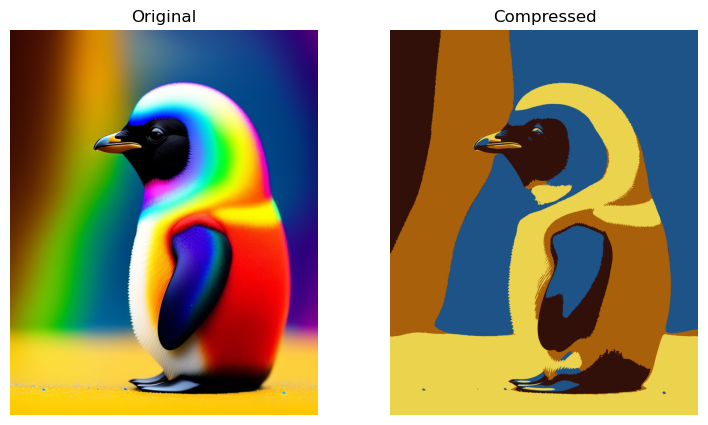

In [22]:
def show_images(image1, image2, title1="Pic 1", title2="Pic 2"):
    fig, axes = plt.subplots(1, 2, figsize=(9, 5))

    axes[0].imshow(image1)
    axes[0].set_title(title1)
    axes[0].axis("off")

    axes[1].imshow(image2)
    axes[1].set_title(title2)
    axes[1].axis("off")

    plt.show()


show_images(
    image1=pic_original,
    image2=pic_updated,
    title1="Original",
    title2="Compressed",
)

Here is k-means (with PCA dimensionality reduction) on the penguin data:

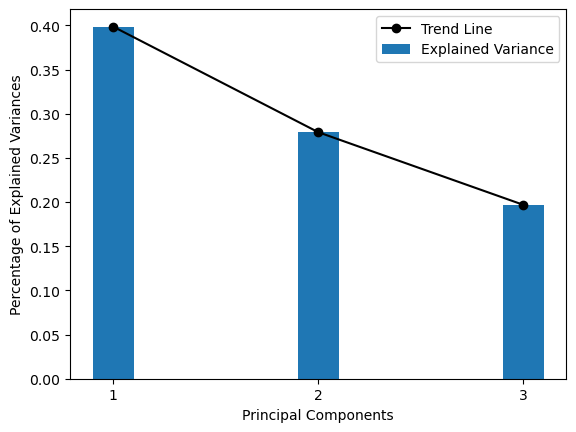

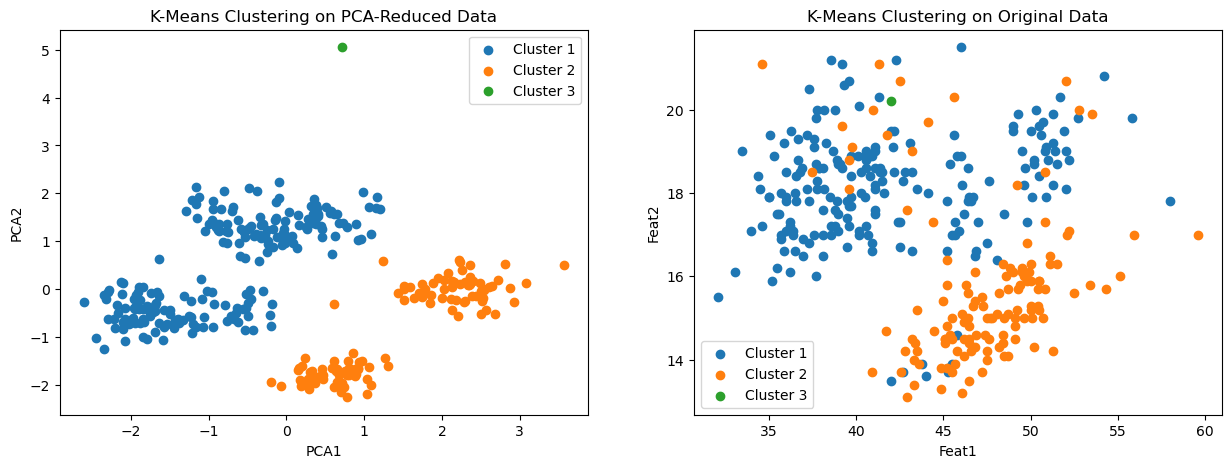

Silhouette Score PCA-K-Means: 0.4703. Silhouette Score K-Means: 0.6285


In [23]:
kmeans_vs_pca(penguins,0,use_95=True,n_clusters=3,n_components=3)

Here is k-means (with t-SNE dimensionality reduction) on the penguin data:

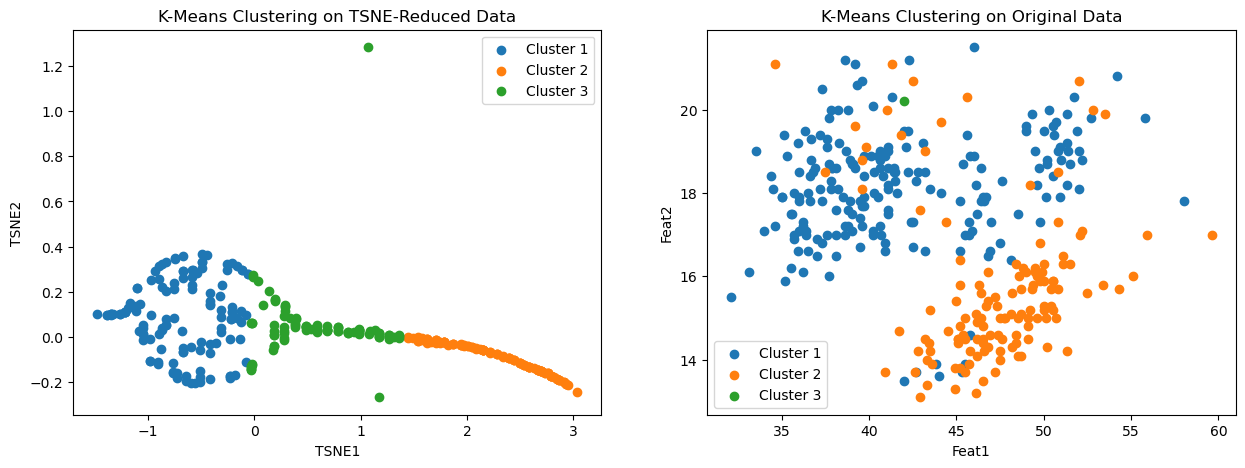

Silhouette Score TSNE-K-Means: 0.5498. Silhouette Score K-Means: 0.6285


In [24]:
kmeans_vs_tsne(penguins, y, n_clusters=3, init='kmeans++', random_state=42, use_95=False, perplexity=5, learning_rate=1.2)

After running this on real data (where clusters in the original dataset aren't as clear and neat as the Iris or generated datasets), we can see that dimensionality reduction techniques can be an effective method of improving unsupervised learning techniques such as K-Means by making the clusters clearer. Techniques such as these can apply to other areas, such as healthcare or sports. 